# Лабораторная работа 1

Не забываем загрузить библиотеки:

In [1]:
# Библиотека для работы с матрицами
import numpy as np 

# Алгоритмы линейной алгебры
import scipy.linalg as sla

# Библиотека для работы с разреженными матрицами
import scipy.sparse as sps

# Алгоритмы линейной алгебры для разреженных матриц
import scipy.sparse.linalg as spla

# Графическая библиотека
import matplotlib.pyplot as plt

# Позволяет отрисовывать графики и изображения прямо в ноутбуке, а не в отдельном окне. Жизненно важная вещь!
%matplotlib inline

## Часть 1. Особенности LU-разложения

С точки зрения математики матричные разложения являются точными: произведение сомножителей всегда равняется исходной матрицы $A$. К сожалению, на практике этом часто мешает вычислительная погрешность. 

Для $LU$ разложения l2-норма ошибки ошибки $||\delta A|| = ||A - LU||$ удовлетворяет следующей оценке:

$$||\delta A|| \leqslant ||L|| \cdot ||U|| \cdot O(\varepsilon_{machine})$$

А нормы $L$ и $U$ могут быть совсем нехорошими.

**Задание 1.1 (1 балл)** Рассмотрим следующее LU-разложение:

$$\begin{pmatrix}
10^{-20} & 1\\
1 & 1
\end{pmatrix} = \begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}\cdot\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}$$

Перемножьте полученные матрицы $L$ и $U$. А теперь перемножьте такие же матрицы, только после всех единиц поставьте десятичные точки. Изменился ли ответ? Как вам кажется, почему?

In [2]:
l = np.array([[1, 0], [10 ** 20, 1]])
u = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
print(l.dot(u))

[[1e-20 1]
 [1.0 1]]


In [3]:
l = np.array([[1., 0], [10 ** 20, 1.]])
u = np.array([[10 ** (-20), 1.], [0., 1. - 10 ** 20]])
print(l.dot(u))

[[1e-20 1.0]
 [1.0 0.0]]


**Вывод:** Результаты вызова функции матричного умножения отличаются для целых и чисел с плавающей точкой. Причем для первых ответ посчитан верно, а для вторых - нет. Такое происходит из-за того, что для вычисления операций над целыми числами используется длинная арифметика, позволяющая вычислять значения точно. Числа с плавающей точкой в памяти компьютера представляются более сложным образом. А именно, имеется 1 бит для знака, 52 бита на мантиссу и 11 бит на порядок. При вычитании ${1 - 10^{20}}$ сначала происходит выравнивание мантисс, но при выполнении вычитания 1 не даст вклада в результат, т.к. оно слишком мало по сравнению с $1e20$.

Отметим, что в реальных вычислениях матричные элементы почти наверняка с самого начала будут числами с плавающей точкой (а не целыми).

Теперь проверьте, что будет, если вычислить QR-разложение исходной матрицы и перемножить матрицы $Q$ и $R$.

In [4]:
q, r = sla.qr(np.array([[10 ** (-20), 1], [1 ,1]]))
q.dot(r)

array([[0., 1.],
       [1., 1.]])

**Вывод:** После вычисления QR-разложения результат перемножения матриц близок к верному.

**Выход: LU-разложение с выбором главного элемента (по столбцу)**

Каждый раз ищем максимум в столбце и переставляем соответствующую строку наверх.

$$\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{blue}{b_{ii}} & \color{blue}{b_{i,i+1}} & \dots & \color{blue}{b_{in}} \\
 & & b_{i+1,i} & b_{i+1,i+1} & \dots & b_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & \vdots & \vdots & & \vdots\\
\end{pmatrix}\longrightarrow
\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & b_{i+1,i} & b_{i+1,i+1} & \dots & b_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & \color{blue}{b_{ii}} & \color{blue}{b_{i,i+1}} & \dots & \color{blue}{b_{in}} \\
 & & \vdots & \vdots & & \vdots\\
\end{pmatrix}\longrightarrow$$
$$\longrightarrow\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & 0 & b'_{i+1,i+1} & \dots & b'_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & 0 & b'_{i,i+1} & \dots & b'_{in} \\
 & & \vdots & \vdots & & \vdots
\end{pmatrix}$$

Надо сказать, что примерно так вы все и решали системы на первом курсе университета! Именно наибольший, а не первый ненулевой элемент столбца берётся потому, что чем больше число - тем меньшие погрешности потенциально вносит деление на него.

Что при этом происходит? Перестановка строк матрицы равносильна умножению её слева на матрицу соответствующей перестановки. Таким образом, мы получаем равенство

$$L_nP_nL_{n-1}P_{n-1}\ldots L_2P_2L_1P_1 A = U\qquad\qquad(1)$$

где $L_1,\ldots,L_n$ - некоторые нижнетреугольные матрицы.

**Вопрос:** Ну, и где здесь матрица $L$?!

**Ответ:** Введём новые матрицы

\begin{align*}
L'_n &= L_n\\
L'_{n-1} &= P_nL_nP_{n-1}\\
L'_{n-2} &= P_nP_{n-1}L_{n-1}P_n^{-1}P_{n-1}^{-1}\\
&\ldots\\
L'_1 &= P_nP_{n-1}\ldots P_2L_1P_2^{-1}\ldots P_{n-1}^{-1}P_n^{-1}
\end{align*}

**Упражнение.** Матрицы $L'_i$ тоже нижнетреугольные!

Тогда левая часть (1) перепишется в виде

$$\underbrace{L'_nL'_{n-1}\ldots L'_1}_{:=L^{-1}}\underbrace{P_nP_{n-1}\ldots P_1}_{:=P^{-1}}\cdot A$$

**Итог:** разложение вида
$$A = PLU$$
где $P$ - матрица перестановки.

Функция `scipy.linalg.lu` в Питоне находит именно такое разложение!

Все элементы $L$ не превосходят $1$, так что $||L||]\leqslant 1$. При этом
$$||\Delta A|| \leqslant ||A||\cdot O(\rho \varepsilon_{machine}),$$
где
$$\rho = \frac{\max_{i,j}|u_{ij}|}{\max_{i,j}|a_{ij}|}$$
Это число называется *фактором роста матрицы*.

Но что, если это отношение велико?

**Задание 1.2 (1 балл)** Сгенерируйте матрицу $500\times500$, имеющую вид

$$\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 & 0 & 1\\
-1 & 1 & 0 &  &  & 0 & 1\\
-1 & -1 & 1 & 0  &  & 0 & 1\\
\vdots & & \ddots & \ddots  & \ddots & \vdots & \vdots \\
-1 & -1 & -1 & \ddots & 1 & 0 & 1\\
-1 & -1 & -1 &  & -1 & 1 & 1\\
-1 & -1 & -1 & \cdots & -1 & -1 & 1
\end{pmatrix}$$

Например, сгенерировать сначала нулевую матрицу нужного размера, а потом заполнить её клетки правильными числами.

Найдите её PLU-разложение и QR-разложение. Убедитесь, что $P = E$. Вычислите $||A - LU||_2$ и $||A - QR||_2$. Чему равен фактор роста матрицы $A$? Сделайте вывод об устойчивости (или не устойчивости) нахождения PLU-разложения.

In [5]:
matrix_size = 500
matrix = np.zeros((matrix_size, matrix_size))
for i in range(matrix_size):
    matrix[i][i] = 1
    matrix[i][-1] = 1
    for j in range(i + 1, 500):
        matrix[j][i] = -1
        
p, l, u = sla.lu(matrix)
q, r = sla.qr(matrix)

assert np.array_equal(p, np.eye(matrix_size))

print("Норма для lu-разложения: {0}\nНорма для qr-разложения: {1}".format(sla.norm(matrix - l.dot(u), 'fro'),
                                                                          sla.norm(matrix - q.dot(r), 'fro')))
print("Фактор роста матрицы А: {0}".format(np.float(np.max(np.abs(u))) / np.max(np.abs(matrix))))

Норма для lu-разложения: 3.102517070422723e+116
Норма для qr-разложения: 1.1141449348578183e-12
Фактор роста матрицы А: 1.636695303948071e+150


**Вывод:** Фактор роста матрицы A большой, поэтому невязка для lu разложения велика. Следовательно, PLU-разложение не устойчиво.  
При этом QR-разложение имеет маленькую невязку.

К счастью, на практике так редко бывает (чёрт его знает почему). Тем не менее, QR-разложение всё-таки лучше. Теоретическая оценка для ошибки QR-разложения имеет вид

$$||A - QR||_2 \leqslant ||A||_2\cdot O(\varepsilon_{machine})$$

**Задание 1.3 (1 балл)** Рассмотрим *матрицу Паскаля* $S_n = \left(C_{i + j}^i\right)$ ($i,j = 0,\ldots,n-1$).

Каково её LU-разложение? Выведите формулы для матриц L и U и приведите краткое обоснование прямо в ноутбуке. Не пользуйтесь функцией `scipy.linalg.lu`, чтобы его "угадать": матрица P будет отлична от единичной, и вы получите не то, что хотели.

Каков её определитель? Обязательно обоснуйте ответ.

**Решение:**
Рассмотрим модификацию метода Гаусса: будем на каждом шаге вычитать из последней строки предпоследнюю, из предпоследней - предпредпоследнюю и т.д. Тогда получим, что все строки, из которых мы вычитали, сдвинутся на 1 вправо (т.к. $C_{i+j}^{i} - C_{i-1+j}^{i-1} = C_{i+j - 1}^{i}$). По построению приходим к матрице следующего вида:
$$ a_{i,j} =
  \begin{cases}
    C_{i}^{j}, \quad i \le j\\
    0,  \quad i > j
  \end{cases}
$$
Тогда после выполнения метода Гаусса мы получим верхнетреугольную матрицу, определитель которой равен 1 (на диагонали находятся только единицы).

Напишите функцию `my_pascal(n)`, генерирующую матрицу Паскаля размера $n\times n$.

In [6]:
import math


def my_pascal(n):
    pascal_matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            pascal_matrix[i][j] = math.factorial(i + j) / (math.factorial(i) * math.factorial(j))
    return pascal_matrix

Найдите норму разности $||A - PLU||_2$. Не такая уж и большая, правда?

In [7]:
A = my_pascal(30)

# Find ||A - PLU||_2 here
p, l, u = sla.lu(A)
sla.norm(A - p.dot(l).dot(u), 'fro')

5.429685280720329

Теперь попросим компьютер вычислить определитель матрицы Паскаля $30\times30$ и решить простенькую систему уравнений:

In [8]:
print(sla.det(A))

# Try to solve a linear system
x = np.ones(30)
b = A.dot(x)
x1 = sla.solve(A, b)
print(sla.norm(x1 - x))

1.0299188904699096e+48
36330572.97193204


/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.86748e-26): result may not be accurate.
  


Так себе ошибка. Теперь попробуем сделать это с помощью QR-разложения. Станет ли лучше?

In [9]:
Q, R = sla.qr(A)
x2 = sla.solve_triangular(R, Q.T.dot(b))
print(sla.norm(x2 - x))

319988569.8351313


In [10]:
"Число обусловленности матрицы А: {}".format(np.linalg.cond(A))

'Число обусловленности матрицы А: 4.0907275701925665e+25'

Объясните полученные неприятные результаты.

**Вывод:** Число обусловленности матрицы A велико, т.е. вычисление решения СЛАУ сильно зависит от входных значений, поэтому и норма имеет большое значение

## Часть 2. Решение СЛАУ с положительно определённой матрицей

**Задание 2.1. Какие же методы использовать? (3 балла)**

Реализуйте несколько алгоритмов решения СЛАУ $Ax = B$, где $A = A^T$, $A \geqslant 0$ с матричной правой частью $B$.

1. **Наивный способ**: $x = A^{-1}B$;

2. **Стандартный способ**: с помощью процедуры `solve` модуля `scipy.linalg`;

3. **Разложение Холецкого**: с помощью разложения Холецкого для матрицы $A$ и последующего решения двух СЛАУ с треугольными матрицами;

4. **Разложение Холецкого с процедурами scipy**: с помощью разложения Холецкого для матрицы $A$ и специальных процедур из пакета `scipy.linalg` (`cho_factor`, `cho_solve`).

Для решения СЛАУ с треугольной матрицей можно воспользоваться функцией `solve_triangular` из пакета `scipy.linalg`.

In [11]:
def naive_solve(A, B):
    return sla.inv(A).dot(B)
    
def standard_solve(A, B):
    return sla.solve(A, B)
    
def cho_solve(A, B):
    lower_matrix = sla.cholesky(A, lower=True)
    return sla.solve_triangular(lower_matrix.T, sla.solve_triangular(lower_matrix, B, lower=True), lower=False)
    
def scipy_cho_solve(A, B):
    return sla.cho_solve(sla.cho_factor(A), B)

Проведите тестирование реализованных алгоритмов на небольшой СЛАУ на предмет совпадения ответов

In [12]:
def GetPositiveDefiniteMatrx(matrix_size):
    matrix  = np.random.randn(matrix_size, matrix_size)
    return matrix.dot(matrix.T)

def GetSLAU(matrix_size, b_size):
    A = GetPositiveDefiniteMatrx(matrix_size)
    X = np.random.randn(matrix_size, b_size)
    B = A.dot(X)
    return A, B, X

def test_all(A, B, X, methods):
    for method in methods:
        X_method = method(A, B)
        print("Метод решения: {}, 2 норма: {}".format(method.__name__, sla.norm(X_method - X)))

        
methods = [naive_solve, standard_solve, cho_solve, scipy_cho_solve]
test_all(*GetSLAU(100, 150), methods)

Метод решения: naive_solve, 2 норма: 2.668410200923189e-09
Метод решения: standard_solve, 2 норма: 2.452392648150524e-09
Метод решения: cho_solve, 2 норма: 2.672830022050626e-09
Метод решения: scipy_cho_solve, 2 норма: 2.388411519911489e-09


**Вывод:** Каждый из алгоритмов имеет маленькие погрешности при нахождении решения СЛАУ с положительно определенной матрицей.

Проведите эксперименты и выясните, как меняется время работы этих методов

- с ростом размера матрицы $A$ при фиксированном числе правых частей. Рассмотрите системы с 10, 100, 1000 правых частей;

- с ростом числа правых частей при фиксированном размере матрицы $A$ (например, $100\times100$).

Обязательно нарисуйте графики (время работы от размера). Какой метод оказывается более быстрым?

Для тестирования вам пригодятся случайные матрицы, сгенерированные с помощью функции `numpy.random.randn`. Но не забудьте, что в задаче речь идёт о *симметрических положительно определённых матрицах*. Так что подумайте, как из случайных матриц сделать симметрические положительно определённые.

Матрицы левых частей должны быть не менее $100\times100$: при меньших размерностях заметную роль могут играть факторы, не имеющие отношения к алгебре. Мы рекомендуем рассматривать системы с матрицами размера от 100 до 1000 и с числом правых частей от 10 до 10000. Приготовьтесь к тому, что эксперименты могут занять какое-то время.

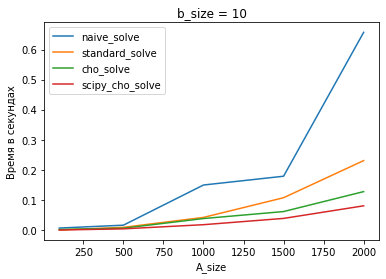

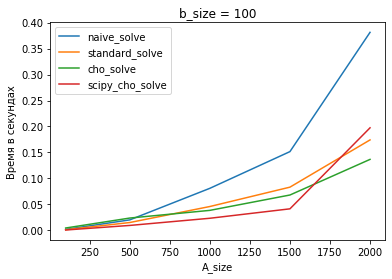

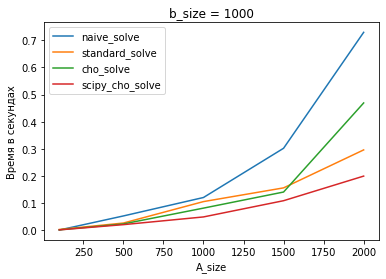

In [15]:
from datetime import datetime

b_sizes = [10, 100, 1000]
matrix_sizes = [100, 500, 1000, 1500, 2000]

for b_size in b_sizes:
    times = dict()
    for method in methods:
        times[method.__name__] = []
    for matrix_size in matrix_sizes:
        A, B, X = GetSLAU(matrix_size, b_size)
        for method in methods:
            begin = datetime.now()
            _ = method(A, B)
            end = datetime.now()
            times[method.__name__].append((end - begin).total_seconds())
    plt.title("b_size = {}".format(b_size))
    plt.xlabel("A_size")
    plt.ylabel("Время в секундах")
    legend = []
    for name, values in times.items():
        plt.plot(matrix_sizes, values)
        legend.append(name)
    plt.legend(legend)
    plt.show()

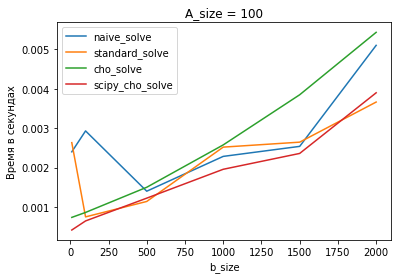

In [17]:
b_sizes = [10, 100, 500, 1000, 1500, 2000]

times = dict()
for method in methods:
    times[method.__name__] = []
    
for b_size in b_sizes:
    A, B, X = GetSLAU(100, b_size)
    for method in methods:
        begin = datetime.now()
        _ = method(A, B)
        end = datetime.now()
        times[method.__name__].append((end - begin).total_seconds())
        
plt.title("A_size = {}".format(100))
plt.xlabel("b_size")
plt.ylabel("Время в секундах")
legend = []
for name, values in times.items():
    plt.plot(b_sizes, values)
    legend.append(name)
plt.legend(legend)
plt.show()

**Вывод:**   
1) При увеличении размера матрицы A время работы каждого алгоритма для решения СЛАУ увеличивается. Разложение Холецкого с процедурами scipy работает наиболее эффективно по времени.  
2) К сожалению, графики при фиксированном размере матрицы А и росте правых частей не такие красивые. Видно, что время увеличивается при увеличинии размера правой части, однако для одного и того же размера какие-то алгоритмы могут быть лучше или хуже остальных (нужно смотреть по задаче).

**Задание 2.2. Пример: вычисление логарифма плотности многомерного нормального распределения (3 балла)**

Случайная величина $\vec{x}\in\mathbb{R}^D$ имеет многомерное нормальное распределение, если её плотность может быть представлена как
$$
p(\vec{x}) = \mathcal{N}(\vec{x}|\vec{\mu},\Sigma) = \frac{1}{\sqrt{2\pi}^D\sqrt{\det\Sigma}}\exp\left(-\frac{1}{2}(\vec{x}-\vec{\mu})^T\Sigma^{-1}(\vec{x}-\vec{\mu})\right)
$$
Здесь $\vec{\mu}\in\mathbb{R}^D -$ вектор мат. ожидания $\vec{x}$, а $\Sigma\in\mathbb{R}^{D{\times}D} -$ матрица ковариации.

С помощью матричных разложений реализуйте алгоритм вычисления логарифма нормальной плотности для набора векторов $X = \{\vec{x}_1,\dots,\vec{x}_N\}$ для заданных $\vec{\mu}$ и $\Sigma$.

**Внимание**. Цель этого задания продемонстрировать вам возможности эффективного использования матричных вычислений, а не воспитать умение ускорять код на Питоне. Поэтому решения, в которых оптимизация достигнута с помощью Numba, Cython, С++-расширений или подобного им инструментария, будут оценены гораздо ниже, чем вы могли бы ожидать. Надеемся на понимание. 

In [18]:
import math

def my_multivariate_normal_logpdf(X, m, S):
    '''
    Ввод
    -----
    X: набор точек, numpy array размера N x D;
    m: вектор средних значений, numpy array длины D;
    S: ковариационная матрицы, numpy array размера D x D.
    
    Вывод
    ------
    res: результат вычислений, numpy array длины N.
    '''
    d = X.shape[1]
    delta = X - m
    res = delta.dot(scipy_cho_solve(S, delta.T))
    res = -0.5 * np.diag(res)
    return res - 0.5 * d * math.log(2 * math.pi) - math.log(sla.det(S))

Сгенерируйте выборку из нормального распределения со случайными параметрами для небольшого $D$ с помощью функции `scipy.stats.multivariate_normal.rvs` и сравните на этой выборке результат работы вашего алгоритма с результатом стандартной функции `scipy.stats.multivariate_normal.logpdf`

In [25]:
from scipy.stats import multivariate_normal

mean = np.zeros(10)
cov = np.eye(10)
X = multivariate_normal.rvs(mean, cov, 5)

In [26]:
my = my_multivariate_normal_logpdf(X, mean, cov)
lib = multivariate_normal.logpdf(X, mean, cov)

In [27]:
sla.norm(my - lib)

1.7763568394002505e-15

**Вывод:** Норма разности между моей функцией и библиотечной мала

Замерьте время работы вашего алгоритма и функции `scipy.stats.multivariate_normal.logpdf` для различных значений $D$. Постарайтесь добиться, чтобы ваш алгоритм выигрывал по скорости у стандартной функции.

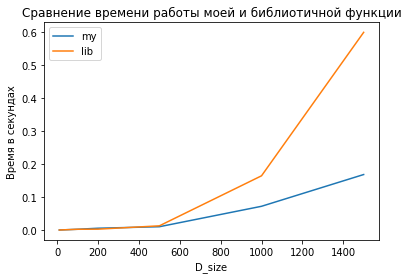

In [28]:
d_size = [10, 100, 200, 500, 1000, 1500]
my_time = []
lib_time = []

for d in d_size:
    zeros = np.zeros(d)
    eye = np.eye(d)
    X = multivariate_normal.rvs(zeros, eye, d // 2)
    
    start = datetime.now()
    my_multivariate_normal_logpdf(X, zeros, eye)
    end = datetime.now()
    my_time.append((end - start).total_seconds())
    
    start = datetime.now()
    multivariate_normal.logpdf(X, zeros, eye)
    end = datetime.now()
    lib_time.append((end - start).total_seconds())

plt.title('Сравнение времени работы моей и библиотичной функции')
plt.xlabel('D_size')
plt.ylabel('Время в секундах')
plt.plot(d_size, my_time)
plt.plot(d_size, lib_time)
plt.legend(['my', 'lib'])
plt.show()

Урааа! Моя функция выигрывает :)

В задаче будут оцениваться:
- удалось ли вам обогнать библиотечную функцию;
- использованы ли вы матричные разложения (или просто обратили матрицу:))
- наличие дополнительных оптимизаций

## Часть 3. Разреженные матрицы

Вот здесь http://docs.scipy.org/doc/scipy/reference/sparse.html можно посмотреть, как различные форматы разреженных матриц реализованы в библиотеке `scipy`.

Вот здесь https://www.cise.ufl.edu/research/sparse/matrices/index.html выложено много разреженных матриц из разнообразных приложений. Что особенно приятно, сайт предоставляет удобный клиент для скачивания, в котором доступен предпросмотр и данные о том, являются ли матрицы симметричными или положительно определёнными.

**Задание 3.1 (0,5 балла)** Когда мы анализировали время преобразований между различными форматами, вы могли заметить, что преобразование из формата `LIL` в формат `CSR` занимает гораздо больше времени, чем преобразования между форматами `COO`, `CSR` и `CSC`. Почему так происходит?

Формат LIL - список списков. Для каждой строки будет хранится хотя бы пустой список. Понятно, что в таком случае при преобразовании из LIL в CSR придется пройтись по всему списку, даже если там нет данных. В форматах COO, CSR и CSC данные хранятся более плотно (всего 3 массива: 2 с индексами и 1 с данными) и перевод между ними менее затруднителен, чем из LIL.

**Задание 3.2 (1 балл)** Торговая сеть предоставила вам данные о покупках своих клиентов, представляющие собою 
таблицу со столбцами 
* Номер записи
* *InvoiceNo* - номер чека
* *StockCode* - код товара
* *Description* - название товара

Чтобы понять, какие товары покупают вместе, вы решили построить (разреженную) матрицу, строки и столбцы которой соответствуют различным товарам, а в клетке с "номером" $(g_1, g_2)$ стоит число $c(g_1 \& g_2)$ --- количество чеков, содержащих оба товара. 

Ниже приведён код, который вам нужно дополнить, дописав функцию ``CreateMatrix``, создающая из структуры pandas.DataFrame разреженную матрицу. Ваша реализация должна удовлетворять следующим свойствам:
* матрица должна создаваться эффективно и по возможности с минимальным числом циклов;
* итоговая матрица должна позволять быстро отвечать на следующие вопросы:
  - сколько всего было куплено товаров данного типа?
  - какие пары товаров покупались вместе чаще всего?
  - какие товары чаще всего покупались вместе с данным товаром?

**Пожалуйста, объясните, почему вы выбрали именно ту, а не иную архитектуру.**

В своём решении я выбрала csr-матрицу, потому что её достаточно легко получить и использовать к данной задаче. Во-первых, каждому коду товара нужно поставить в соответствие свой индекс, который будет играть роль номера строки/столбца в таблице, а в ячейке таблицы будет хранится количество раз, которое данная пара встречалась в чеках.

Загрузим данные:

In [29]:
import pandas as pd
receipts = pd.read_csv('Online_Retail_Short.csv', sep=';')

Распечатаем первые несколько строк, чтобы осознать структуру данных:

In [30]:
receipts.head()

,Unnamed: 0,InvoiceNo,StockCode,Description
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


А теперь та самая функция. Вам могут пригодиться следующие конструкции:

* ``for name, group in data.groupby('InvoiceNo')`` --- цикл, в котором ``name`` будут различными значениями ``InvoiceNo``, а ``group`` --- кусками нашего ``DataFrame`` с заданным значением ``InvoiceNo``.
* ``for g1, g2 in itertools.combinations(list(group['StockCode']), 2)`` --- цикл, пробегающий пары различных элементов (сочетания по 2) из списка товаров из заданной группы.


In [31]:
from collections import defaultdict

import scipy.sparse as sps
import itertools

# Зачем бы нужны следующие две строки?)
idx2code = sorted(set(receipts['StockCode']))
code2idx = {code : i for i, code in enumerate(idx2code)}

code2descr = {code : descr for code, descr in zip(receipts['StockCode'], receipts['Description'])}
descr2code = {descr : code for code, descr in code2descr.items()}


def CreateMatrix(data):
    '''
    Ввод
    -----
    receipts: структура pandas.DataFrame
    
    Вывод
    ------
    res: разреженная матрица
    '''
    pairs = defaultdict((int))
    for name, group in data.groupby('InvoiceNo'):
        for g1, g2 in itertools.combinations(list(group['StockCode']), 2):
            index1 = code2idx[g1]
            index2 = code2idx[g2]
            pairs[index1, index2] += 1
            pairs[index2, index1] += 1

    row, col = [], []
    data = []
    for idx, value in pairs.items():
        row.append(idx[0])
        col.append(idx[1])
        data.append(value)

    return sps.csr_matrix((data, (row, col)), shape=(len(code2idx), len(code2idx)))

А теперь с помощью созданной вами матрицы ответьте на несколько вопросов:

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не id, а названия из столбца ``Descriptions``.

2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

В вашем ноутбуке должно быть продемонстрировано, как вы это находите с помощью матрицы!

In [32]:
csr = CreateMatrix(receipts)

In [33]:
from copy import deepcopy

def GetArgmax(csr):
    csr.sort_indices()
    index = np.argmax(csr.data)
    col = csr.indices[index]
    row = np.searchsorted(csr.indptr, index, side='right') - 1
    code1 = idx2code[row]
    code2 = idx2code[col]
    return code2descr[code1], code2descr[code2]

"Пара товаров, купленна наибольшее число раз: {} и {}".format(*GetArgmax(csr))

'Пара товаров, купленна наибольшее число раз: GREEN REGENCY TEACUP AND SAUCER и ROSES REGENCY TEACUP AND SAUCER '

In [34]:
def GetMaxPair(csr, value):
    idx = code2idx[descr2code[value]]
    res = csr.getrow(idx).argmax()
    return code2descr[idx2code[res]]

GetMaxPair(csr, 'KNITTED UNION FLAG HOT WATER BOTTLE')

'CHOCOLATE HOT WATER BOTTLE'